In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
Student_performance=pd.read_csv('./studentperf.csv')
Student_performance.head()

,Method,satis,time,ability,prvperf,Outcome
0,1,5,22,13,26.5,1
1,1,4,12,27,19.6,0
2,1,2,22,18,26.4,1
3,1,5,20,18,25.1,0
4,1,4,22,29,28.0,1


In [3]:
#Show Key Statistics
Student_performance.describe()

,Method,satis,time,ability,prvperf,Outcome
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,2.000000,4.966667,18.533333,29.216667,22.796667,0.450000
std,0.823387,1.813010,3.586541,11.295854,3.262367,0.501692
min,1.000000,1.000000,12.000000,7.000000,16.000000,0.000000
25%,1.000000,4.000000,16.000000,22.000000,20.375000,0.000000
50%,2.000000,5.000000,18.000000,29.500000,22.700000,0.000000
75%,3.000000,6.000000,22.000000,37.250000,25.225000,1.000000
max,3.000000,9.000000,26.000000,49.000000,32.800000,1.000000


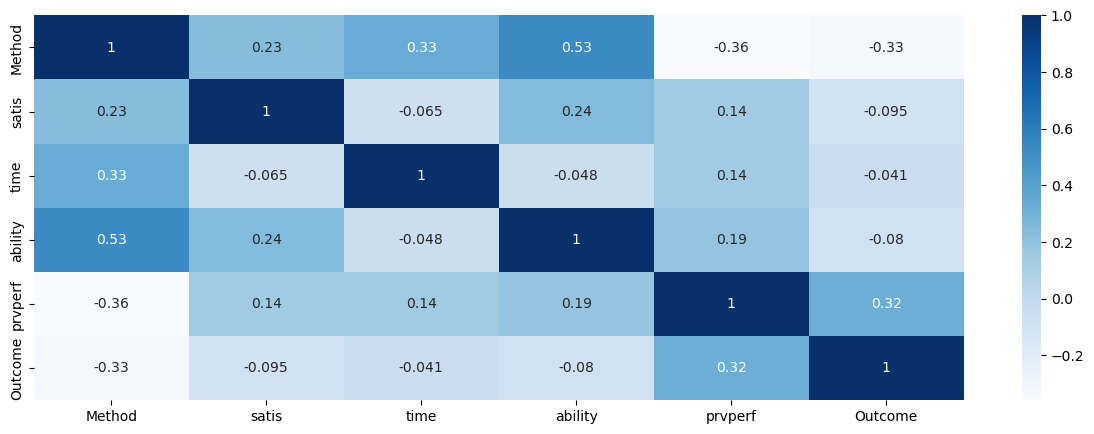

In [4]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(Student_performance.corr(),annot=True,cmap="Blues")
plt.show()

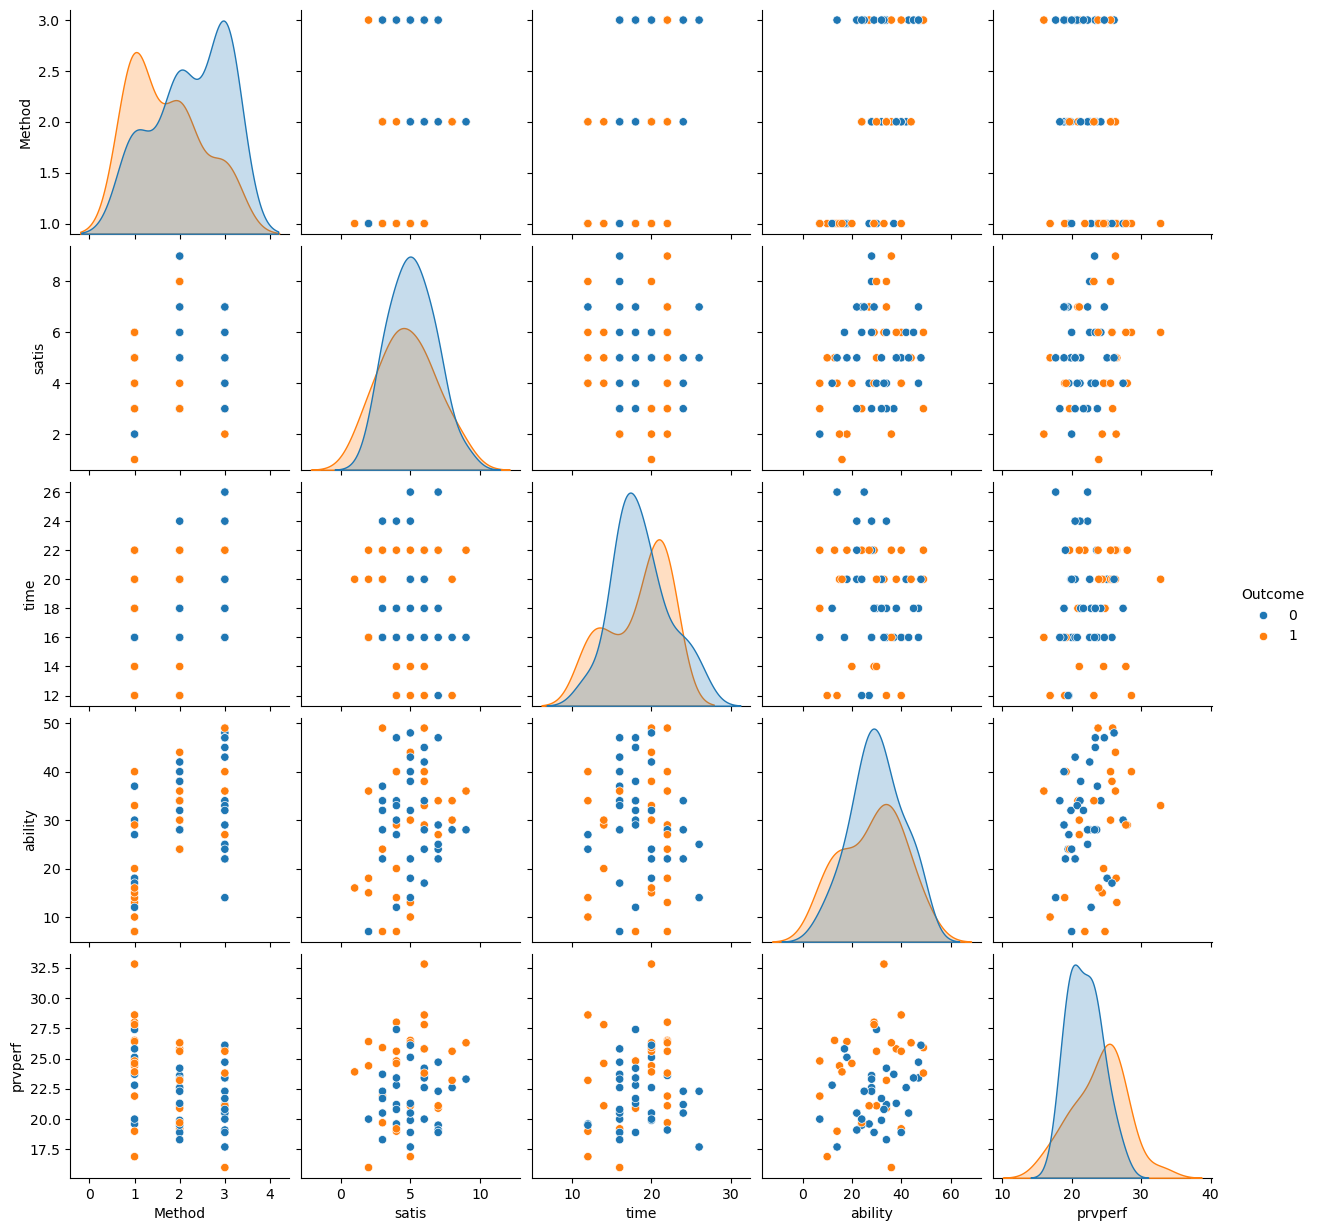

In [5]:
# Pairplot with hue=Outcome
sns.pairplot(Student_performance, hue ='Outcome')
plt.show()

In [6]:
#Define x and y variables
x = Student_performance.drop('Outcome',axis=1).to_numpy()
y = Student_performance['Outcome'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [7]:
#Script for Logistical Regression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix 


for name,method in [('Logistic Regression', LogisticRegression(random_state=100)),
                   ('NN', MLPClassifier (hidden_layer_sizes=(5,3,2),activation='relu',solver='adam',max_iter=10000,random_state=100)),
                   ('Naive Bayes',GaussianNB())]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['Class 0','Class 1']
    print(name)
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))  

Logistic Regression
[[4 3]
 [3 2]]
              precision    recall  f1-score   support

     Class 0       0.57      0.57      0.57         7
     Class 1       0.40      0.40      0.40         5

    accuracy                           0.50        12
   macro avg       0.49      0.49      0.49        12
weighted avg       0.50      0.50      0.50        12

NN
[[5 2]
 [4 1]]
              precision    recall  f1-score   support

     Class 0       0.56      0.71      0.62         7
     Class 1       0.33      0.20      0.25         5

    accuracy                           0.50        12
   macro avg       0.44      0.46      0.44        12
weighted avg       0.46      0.50      0.47        12

Naive Bayes
[[5 2]
 [3 2]]
              precision    recall  f1-score   support

     Class 0       0.62      0.71      0.67         7
     Class 1       0.50      0.40      0.44         5

    accuracy                           0.58        12
   macro avg       0.56      0.56      0.56     